In [0]:
#Created by Sreya Dhar
#Dated: 04/18/20

# Load the Library
library(ggplot2)
library(tidyverse)
library(knitr)

#set seed
set.seed(123)
#inputs
lambda = 0.2; n=40; sim = 1000;
#simulation
sim1 = NULL; for (i in 1:sim){sim1 = c(sim1, mean(rexp(n, lambda)))}
# dimension of sim1
dim(sim1)

NULL

In [0]:
# cretaing a matrix datafarme
data_1 <- as.data.frame(sim1);
dim(data_1)

[1] 1000    1

In [0]:
# statistical means
stats_mean_1 <- data.frame(statistics = c("sample mean", "theoretical mean"),
values = c(mean(data_1$sim1), 1/lambda));
stats_mean_1                       

statistics       values  
1 sample mean      5.011911
2 theoretical mean 5.000000

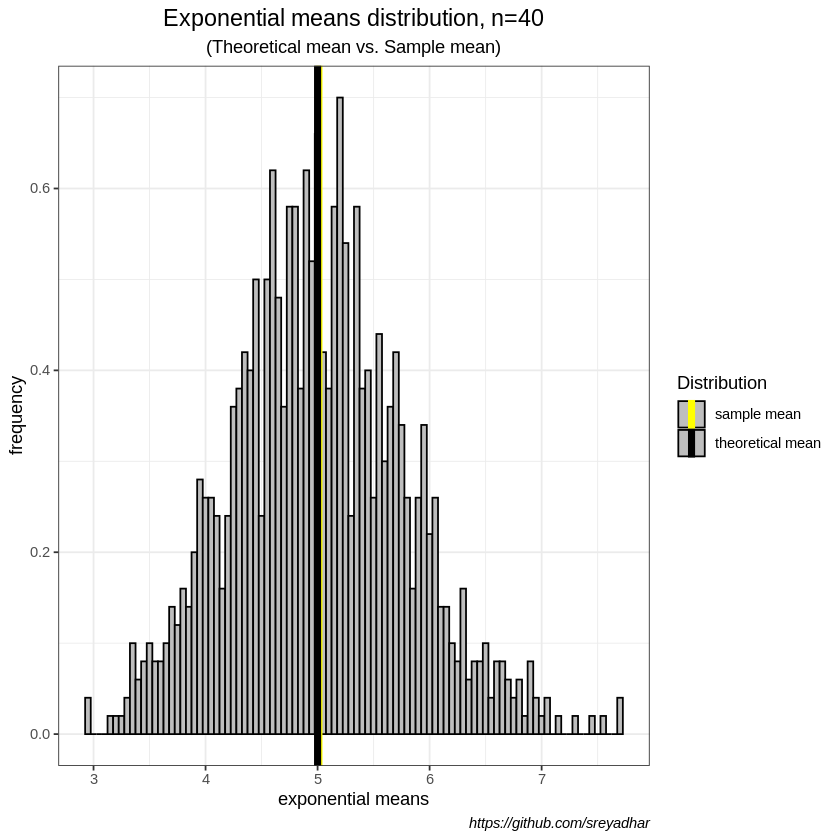

In [0]:
# create the plot
plot_1<-  ggplot(data_1, aes(x = sim1)) + 
          geom_histogram( aes(y=..density..),binwidth = .05,col = "black",fill = "grey",alpha=1, size = .5 ,show.legend = TRUE) + 
          geom_vline(data=stats_mean_1, aes(xintercept = values, col = statistics), size = 2, show.legend = TRUE) + 
          theme_bw() + 
          theme(plot.title = element_text(hjust = 0.5, size = 14),                      # Center title position and size
                             plot.subtitle = element_text(hjust = 0.5),                 # Center subtitle
                             plot.caption = element_text(hjust = 1, face = "italic"))+  # move caption to the left
                             labs(title="Exponential means distribution, n=40", subtitle = "(Theoretical mean vs. Sample mean)", 
                             x = "exponential means", y = "frequency", caption = "https://github.com/sreyadhar")+
                             scale_colour_manual("Distribution", values = c("yellow", "black"))
plot_1  

In [0]:
# statistical standard deviations
stats_sd_1 <- data.frame(statistics = c("sample sd", "theoretical sd"),
values = c(sd(data_1$sim1), sqrt((1/lambda)^2/n)));
stats_sd_1

statistics     values   
1 sample sd      0.7749147
2 theoretical sd 0.7905694

In [0]:
#set seed
set.seed(101)
#inputs
lambda = .2; n=1000; sim = 1000
#simulation
sim2 = NULL; for (i in 1:sim) {sim2 = c(sim2, mean(rexp(n, lambda)))}
# cretaing a matrix datafarme
data_2 <- as.data.frame(sim2); dim(data_2)

[1] 1000    1

In [0]:
stats_mean_2 <- data.frame(statistics = c("sample mean", "theoretical mean"), 
values = c(mean(data_2$sim2), 1/lambda));
stats_mean_2

statistics       values  
1 sample mean      4.990164
2 theoretical mean 5.000000

In [0]:
# statistical standard deviations
stats_sd_2 <- data.frame(statistics_1 = c("sample sd", "theoretical sd"), 
values_1= c(sd(data_2$sim2), sqrt((1/lambda)^2/n)));
stats_sd_2                      

statistics_1   values_1 
1 sample sd      0.1616903
2 theoretical sd 0.1581139

Warning message:
“`mapping` is not used by stat_function()”
Warning message:
“`mapping` is not used by stat_function()”


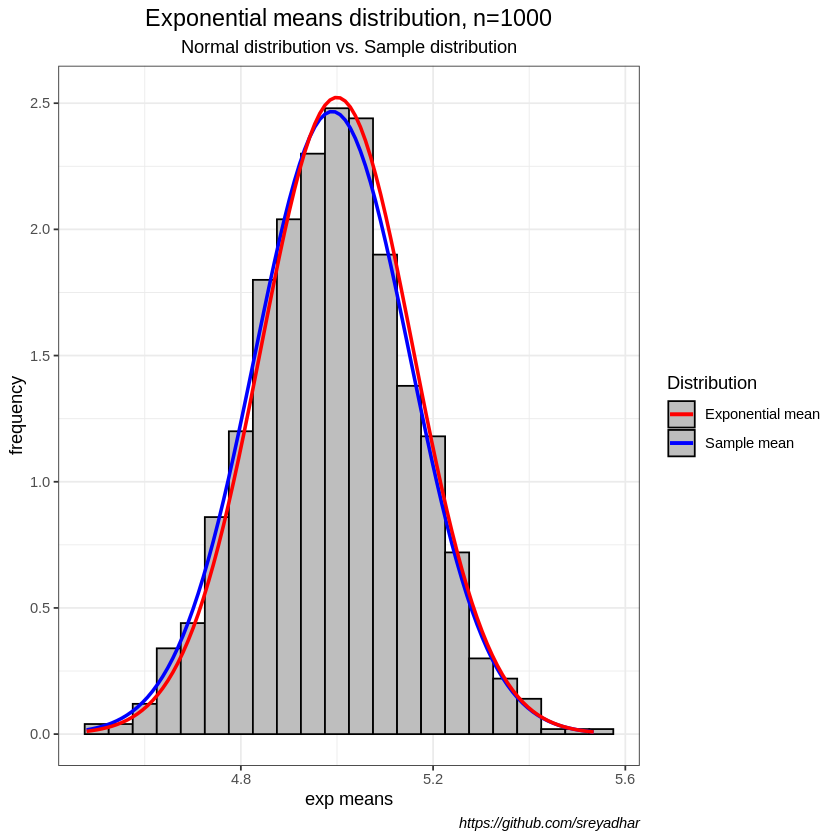

In [0]:
# create the plot for 1000 samples
plot_2 <- ggplot(data_2, aes( x = sim2)) + 
          geom_histogram( aes(y=..density..),binwidth = .05,col = "black",fill = "grey",size = .5 ,show.legend = TRUE) + 
          stat_function(aes(color = "Sample mean"), fun = dnorm, args = list(mean = mean(sim2),sd = sqrt(var(sim2))) ,size = 1)+                         
          stat_function(aes(color = "Exponential mean"), fun = dnorm, args = list(mean = 1/lambda,sd = sqrt((1/lambda)^2/n)),size = 1)+ 
          scale_colour_manual("Distribution", values = c("red", "blue"))+                    
          theme_bw()+ 
          theme(plot.title = element_text(hjust = 0.5, size = 14),                # Center title position and size
          plot.subtitle = element_text(hjust = 0.5),                              # Center subtitle
          plot.caption = element_text(hjust = 1, face = "italic"))+               # move caption to the left
          labs(title="Exponential means distribution, n=1000"  ,subtitle = "Normal distribution vs. Sample distribution",
          x = "exp means", y = "frequency", caption = "https://github.com/sreyadhar")
plot_2                                     

In [207]:
# Calculating Confidence Interval of Sample mean
numSample = 1000;
acutalMeanCI <- mean(data_1$sim1) + c(-1, 1) *qt(.975, df = numSample-1)*(1/lambda)/sqrt(numSample); acutalMeanCI 

[1] 4.701638 5.322185

In [0]:
theoretical Mean = 5.0 lies between 95% CI of sample mean [4.701638 5.322184]; So the Sample distribution is approximately normal.